In [ ]:
#kütüphanlerin yüklenmesi
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Activation, BatchNormalization, Flatten
import cv2 #opencv
import os #dosya yolları için yardımcı olacak
import time
import uuid
import glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#klasör yolu
print(os.listdir("/content/drive/MyDrive/Hackathon"))

#sabitlerin belirlenmesi
image_width= 128
image_height= 128
image_size=(image_width,image_height)
image_channels= 3 #görüntüler RGB olduğu için

#eğitim verisinin hazırlanması
filenames=os.listdir("/content/drive/MyDrive/Hackathon/train")
categories=[]


['train', 'test']


In [ ]:
#cardboard glass
for filename in filenames:
    category=filename[0:2]
    if category == "ca":
       categories.append((1)) 
    elif category == "gl":
       categories.append((2)) 
    elif category == "me":
       categories.append((3))  
    elif category == "pa":
       categories.append((4)) 
    elif category == "pl":
       categories.append((5))

In [ ]:
df=pd.DataFrame({"filename":filenames,"category":categories})
df

,filename,category
0,glass173.jpg,2
1,cardboard201.jpg,1
2,cardboard164.jpg,1
3,glass288.jpg,2
4,glass270.jpg,2
...,...,...
1495,cardboard149.jpg,1
1496,glass243.jpg,2
1497,glass290.jpg,2
1498,glass231.jpg,2


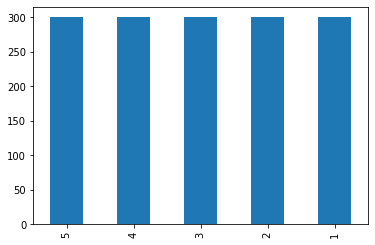

In [ ]:
#verilerin bar gösterimi 

df["category"].value_counts().plot.bar()


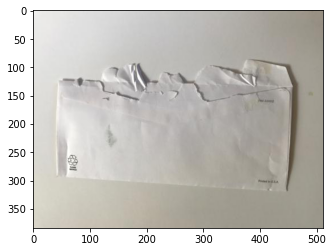

In [ ]:
#rastgele görüntü seçilmesi
sample=random.choice(filenames)
image=load_img("/content/drive/MyDrive/Hackathon/train/"+sample)
plt.imshow(image)


In [ ]:
# Modelin oluşturulması
model = Sequential()
model.add(Conv2D(32,(3,3) , activation="relu", input_shape=(image_width,image_height,image_channels)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128,(3,3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512 , activation= "relu"))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(5, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 61, 61, 64)       2

In [ ]:
#modelin derlenmesi

model.compile(loss="categorical_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

In [ ]:
#verilerin hazırlanması
df["category"]=df["category"].replace({ 1 : "cardboard", 2 : "glass", 3 : "metal", 4 : "paper", 5 : "plastic"})
train_df, validate_df = train_test_split(df,test_size=0.2)
train_df=train_df.reset_index(drop=True)
validate_df=validate_df.reset_index(drop=True)


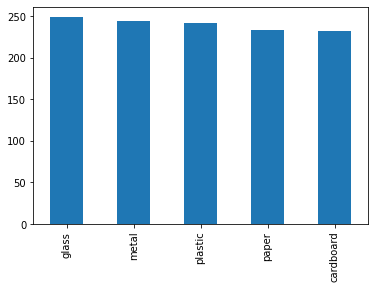

In [ ]:
#kategorilere bakılması
train_df["category"].value_counts().plot.bar()

In [ ]:
#eğitim ve doğrulanma verisinin hazırlanması
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15


In [ ]:
#eğitim verilerinin çoğaltılması
train_datagen = ImageDataGenerator(
    rotation_range =15,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    
)

In [ ]:
train_generator=train_datagen.flow_from_dataframe(
    train_df,
    "/content/drive/MyDrive/Hackathon/train/",
    x_col = "filename",
    y_col="category",
    target_size=image_size,
    class_mode="categorical",
    batch_size=batch_size
    
)

Found 1200 validated image filenames belonging to 5 classes.


In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
validation_generator=validation_datagen.flow_from_dataframe(
    validate_df,
    "/content/drive/MyDrive/Hackathon/train/",
    x_col = "filename",
    y_col="category",
    target_size=image_size,
    class_mode="categorical",
    batch_size=batch_size
    
)

Found 300 validated image filenames belonging to 5 classes.


In [ ]:
#modelin eğitilmesi
epochs=50
history=model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate,
    
)


Epoch 1/50
80/80 [==============================] - 91s 904ms/step - loss: 2.0371 - accuracy: 0.4250 - val_loss: 3.7463 - val_accuracy: 0.1700
Epoch 2/50
80/80 [==============================] - 66s 822ms/step - loss: 1.5090 - accuracy: 0.4725
Epoch 3/50
80/80 [==============================] - 65s 810ms/step - loss: 1.3467 - accuracy: 0.5217
Epoch 4/50
80/80 [==============================] - 65s 809ms/step - loss: 1.1769 - accuracy: 0.5783
Epoch 5/50
80/80 [==============================] - 65s 810ms/step - loss: 1.0464 - accuracy: 0.6200
Epoch 6/50
80/80 [==============================] - 65s 808ms/step - loss: 0.9851 - accuracy: 0.6317
Epoch 7/50
80/80 [==============================] - 65s 816ms/step - loss: 0.9392 - accuracy: 0.6633
Epoch 8/50
80/80 [==============================] - 66s 817ms/step - loss: 0.8939 - accuracy: 0.6608
Epoch 9/50
80/80 [==============================] - 66s 823ms/step - loss: 0.8665 - accuracy: 0.6867
Epoch 10/50
80/80 [==============================

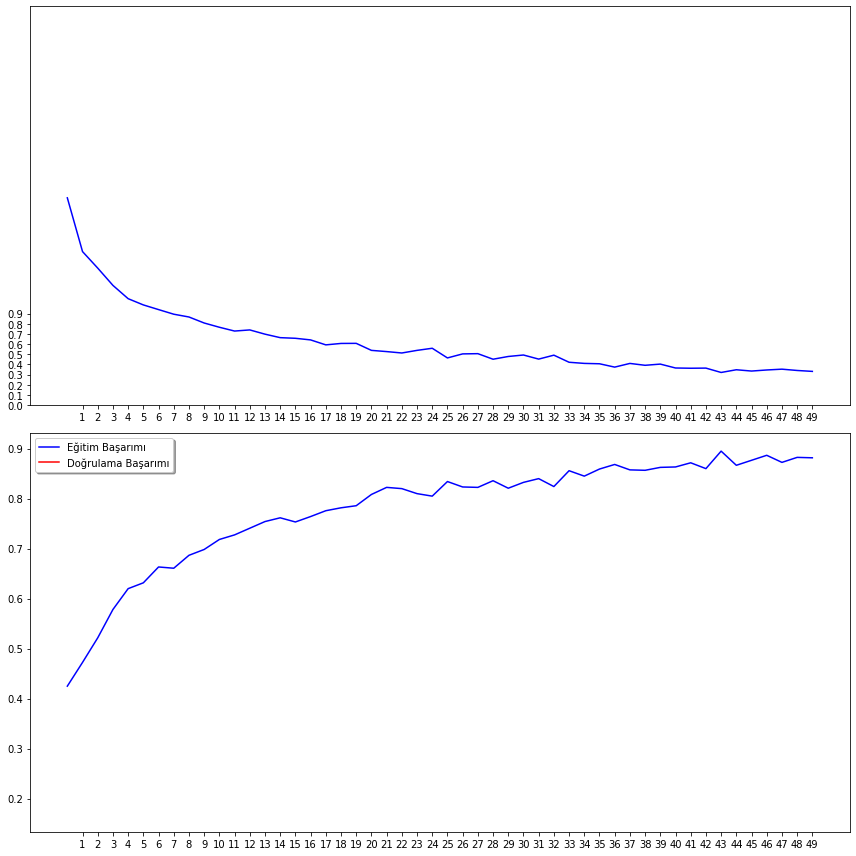

In [ ]:
#eğitim ve doğrulama verilerinin gösterimi
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(12,12))
ax1.plot(history.history["loss"],color="b",label="Eğitim Kaybı")
ax1.plot(history.history["val_loss"],color="r",label="Doğrulama Kaybı")
ax1.set_xticks(np.arange(1,epochs,1))
ax1.set_yticks(np.arange(0,1,0.1))

ax2.plot(history.history["accuracy"],color="b",label="Eğitim Başarımı")
ax2.plot(history.history["val_accuracy"],color="r",label="Doğrulama Başarımı")
ax2.set_xticks(np.arange(1,epochs,1))

legend=plt.legend(loc="best",shadow=True)
plt.tight_layout()
plt.show()



In [ ]:
#test verisinin hazırlanması
test_filenames=os.listdir("/content/drive/MyDrive/Hackathon/test/")
test_df=pd.DataFrame({
    "filename":test_filenames
})
nb_samples=test_df.shape[0]


In [ ]:
#test verilerinin çoğaltılması

test_gen=ImageDataGenerator(rescale=1./255)
test_generator=test_gen.flow_from_dataframe(
    test_df,
    "/content/drive/MyDrive/Hackathon/test/",
    x_col = "filename",
    y_col=None,
    class_mode=None,
    target_size=image_size,
    batch_size=batch_size,
    shuffle=False
)

Found 500 validated image filenames.


In [ ]:
#tahmin işleminin yapılması
predict=model.predict_generator(test_generator,steps=np.ceil(nb_samples/batch_size))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


In [ ]:
#tahmin işleminin hangi kategoriye ait olduğunu belirleme
test_df["category"]=np.argmax(predict,axis=-1)
label_map=dict((v,k) for k,v in train_generator.class_indices.items())
test_df["category"]=test_df["category"].replace(label_map)



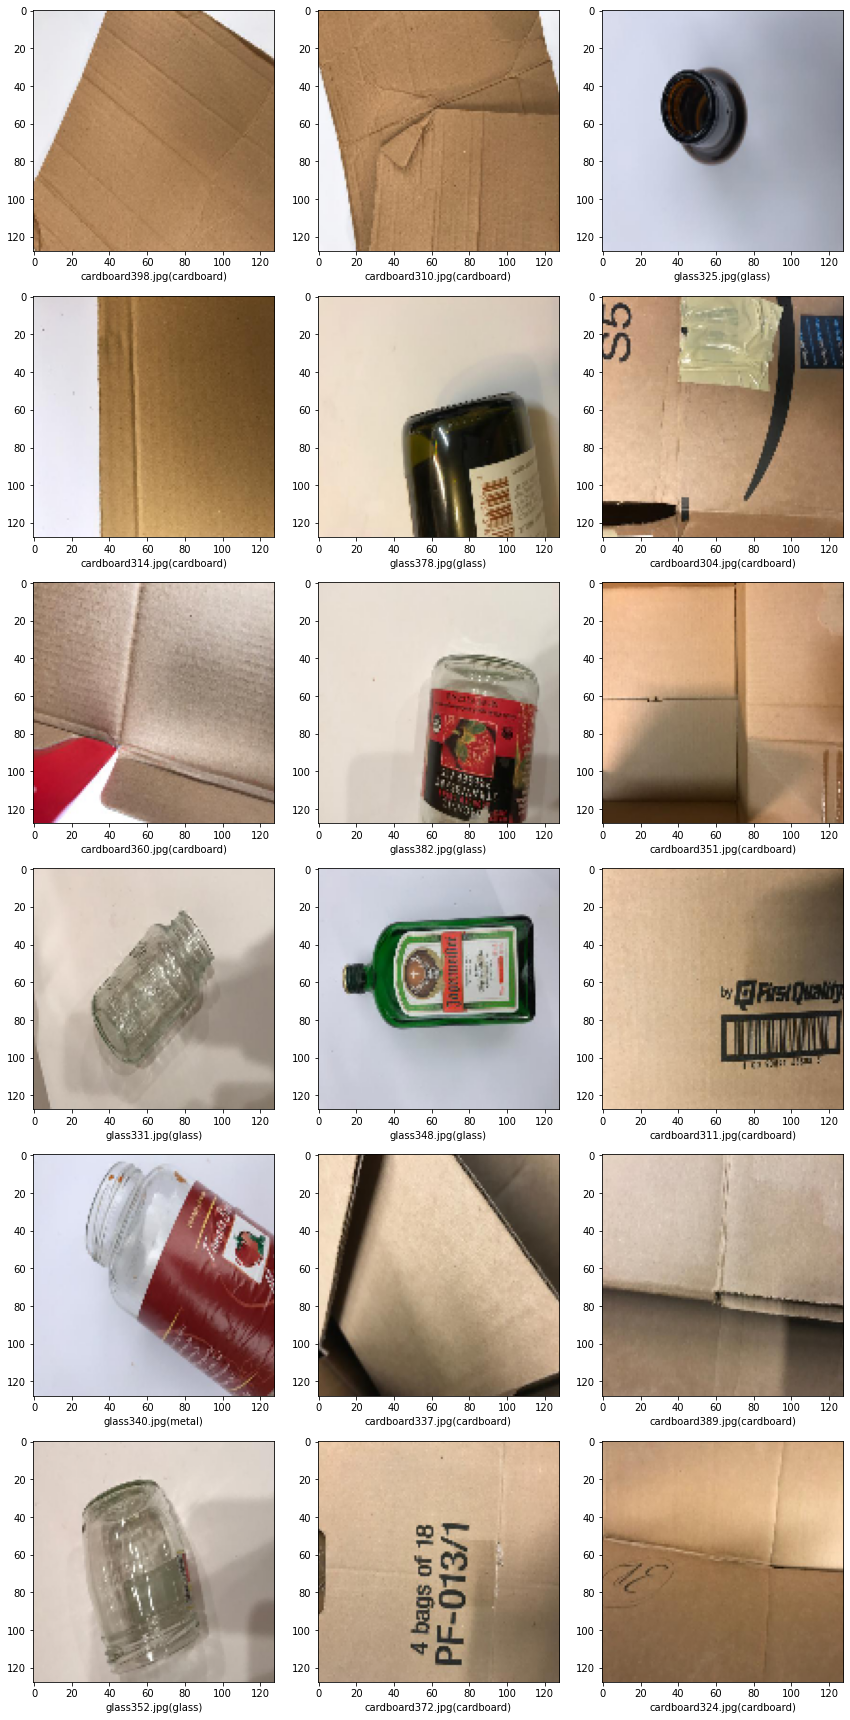

In [ ]:
#tahminlerin değerlendirilmesi
sample_test=test_df.head(18)
sample_test.head()
plt.figure(figsize=(12,24))
for index, row in sample_test.iterrows():
    filename=row["filename"]
    category=row["category"]
    img=load_img("/content/drive/MyDrive/Hackathon/test/"+filename,target_size=image_size)
    plt.subplot(6,3,index+1)
    plt.imshow(img)
    plt.xlabel(filename + "(" +  "{}".format(category)  +  ")")
plt.tight_layout()
plt.show()
